<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/EDA_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/titanic-train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.5000,NaN,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S


1 definir el problema
- caracterizar quienes sobrevivieron a la tragedia del Titanic

-jack se hubiera salvado si rose en la puerta

2.exploracion de datos

*survived: 0=murio, 1=sobrevivio

*pclass: clase de tiquete

*sisbp:#hermanos

*parch:# padres

cabin:# de cabina

embarked: Puerto de embarque	C = Cherburgo, Q = Queenstown, S = Southampton

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [33]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [34]:
total =df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
Survived,0
PassengerId,0
Sex,0
Name,0
Pclass,0
SibSp,0
Ticket,0


In [35]:
porcentaje =(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentaje

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
Survived,0.000000
PassengerId,0.000000
Sex,0.000000
Name,0.000000
Pclass,0.000000
SibSp,0.000000
Ticket,0.000000


# amalizando los datos con pobabilidad de supervivencia

In [36]:
def bar_char(feature):
  suvived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test =pd.DataFrame([suvived,dead])
  test.index=["superviventes","fallecimiento"]
  test.plot(kind="bar",stacked=True,figsize=(10,5))

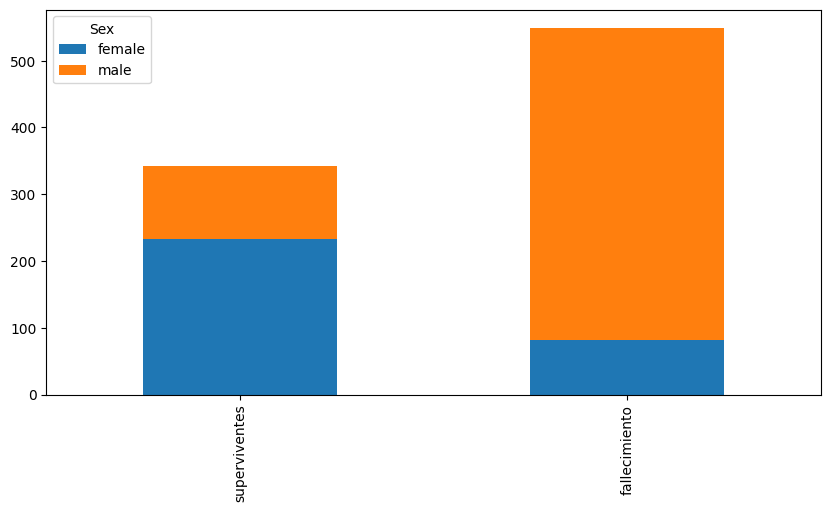

In [37]:
bar_char("Sex")

la grafica señala que las mujeres tuvieron tiene casi 3 veces casi 3 mas probabilidades en el titanic

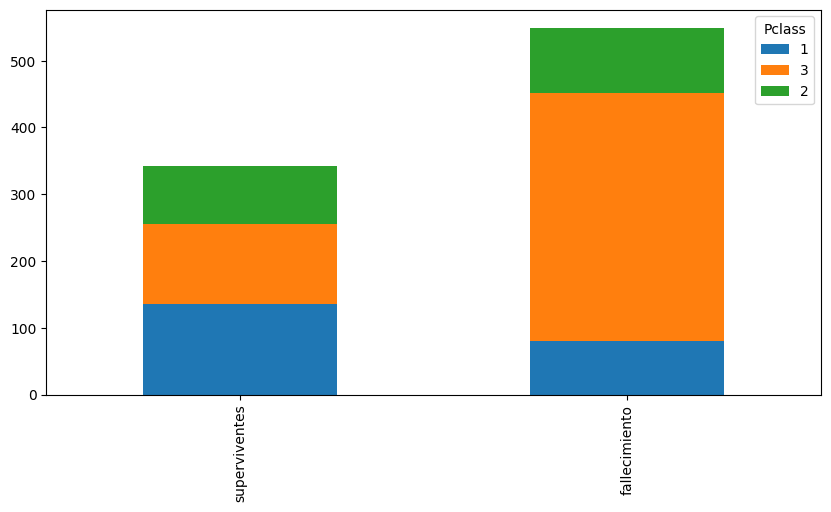

In [38]:
bar_char("Pclass")

la clase alta tuvo la mayor probabilidad de supervivencia con respecto a **otras clases**
la grafica señala que la clase 3 **fallecia mass**
en comparacion a **otras clases**

In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

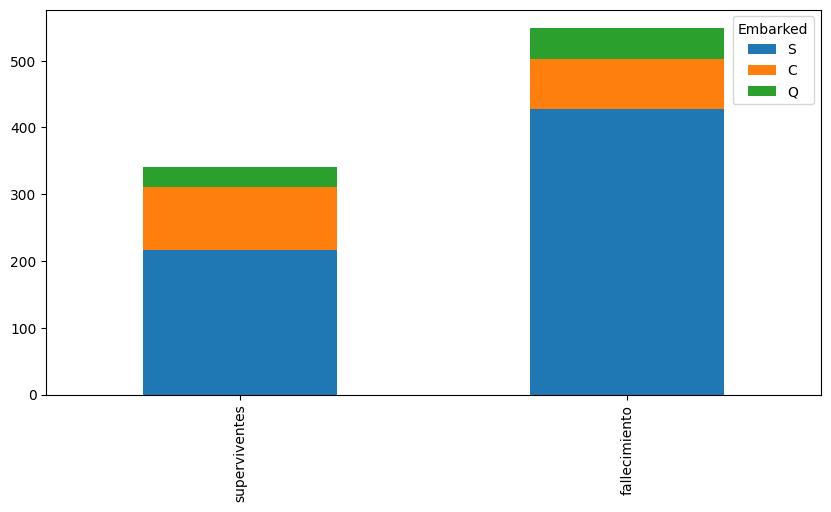

In [40]:
bar_char("Embarked")

la grafica confirma que
*una persona que **aborda desde c** tuvo una ligera probabildad de sobrevivir

*si una persona que abora**Q y S ** probablemente **murio**

## ingenieria de caracteristicas
es el proceso de usar el dominio de conocimiento para crear nuevas
caraceteristicas(featrue vetor) y que logre que los algoritmos de machine learning funcion corctamente.
featurs vector es un n-dimensional que representa un objeto.muchos algoritmos de ml requiere una representacion numericade los obejors y facilita el procesimiento y el analisis estadistico.

la grafica eñala que una persona casas o con hermaños tiene mas probabilidades de morir

##2. creando nuevos vector features


In [53]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1131372151.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


In [52]:
df["Title"]=extract_title(df)
df["Title"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object>

### 2.1 crar unmapa dede titulos

se tomara los valores mas representativos
1.mr:0
2.mr:1
3.mr:2
4.mr:3

In [ ]:
def replace_titles(data):
  title_mapping={"Mr":"Señor", "Miss":"Señorita", "Mrs":"Señora"}
  data["Title"]=data["Title"].map("title_mapping".fillna("otros"))
  return data

In [24]:
df=replace_titles(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


In [44]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

def replace_titles(data):
  title_mapping={"Mr":"Señor", "Miss":"Señorita", "Mrs":"Señora"}
  data["Title"]=data["Title"].map(title_mapping).fillna("otros")
  return data

df["Title"]=extract_title(df)
df=replace_titles(df)
df.head(10)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-788265835.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Señor
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Señor
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,otros
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Señora
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Señora


In [50]:
df["Title"]=extract_title(df)

def replace_titles(data):
  title_mapping={"Mr":"Señor", "Miss":"Señorita", "Mrs":"Señora"}
  data["Title"]=data["Title"].map(title_mapping).fillna("otros")
  return data

df=replace_titles(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


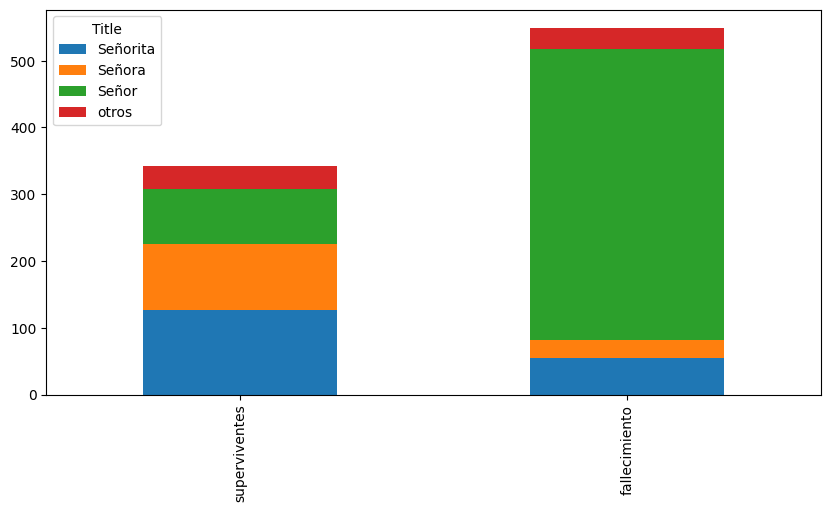

In [51]:
bar_char("Title")

In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [57]:
# eliminar las features que no nos sirven
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


##2.2 Areglando las edades faltantes
se emplearan los titulos para llenar las edades faltantes

In [58]:
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167


In [69]:
df["Age"] = df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"], axis=1)
df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.00000,1,0,7.2500,S,Mr
1,2,1,1,female,38.00000,1,0,71.2833,C,Mrs
2,3,1,3,female,26.00000,0,0,7.9250,S,Miss
3,4,1,1,female,35.00000,1,0,53.1000,S,Mrs
4,5,0,3,male,35.00000,0,0,8.0500,S,Mr
5,6,0,3,male,32.36809,0,0,8.4583,Q,Mr
6,7,0,1,male,54.00000,0,0,51.8625,S,Mr
7,8,0,3,male,2.00000,3,1,21.0750,S,Master
8,9,1,3,female,27.00000,0,2,11.1333,S,Mrs
9,10,1,2,female,14.00000,1,0,30.0708,C,Mrs


In [68]:
df["Age"].isnull().sum()

np.int64(0)